## Work
1. 請將 Epoch 加到 500 個，並觀察 learning curve 的走勢
2. 請將 Optimizer 換成 SGD，並觀察 learning curve 的走勢

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若有 GPU 且想開啟，可設為 "0")
os.environ["CUDA_VISIBLE_DEVICES"] = ""
os.environ['KMP_DUPLICATE_LIB_OK'] = 'True'

Using TensorFlow backend.


In [2]:
# 從 Keras 的內建功能中，取得 train 與 test 資料集
train, test = keras.datasets.cifar10.load_data()

In [3]:
# 將 X 與 Y 獨立放進變數
x_train, y_train = train
x_test, y_test = test
# 資料前處理 - 標準化
x_train = x_train / 255.
x_test = x_test / 255.

# 將資料從圖形 (RGB) 轉為向量 (Single Vector)
x_train = x_train.reshape((len(x_train), -1))
x_test = x_test.reshape((len(x_test), -1))

# 將目標轉為 one-hot encoding
y_train = keras.utils.to_categorical(y_train, num_classes=10)
y_test = keras.utils.to_categorical(y_test, num_classes=10)

In [4]:
def build_mlp():
    """Code Here
    建立你的神經網路
    """
    # 此 處仿照範例，在input、output(softmax)之間，建立三個全連接層做隱藏層
    # 之前直接從第一層隱藏層(Dense層)開始，在建構式裡指定input_dim
    # 但也可以從keras.engine.input_layer.Input()明確地建立input layer開始
    # 這種做法應該就是所謂的functional model
    input_layer = keras.engine.input_layer.Input(shape=[x_train.shape[-1]])
    x = keras.layers.Dense(units=512, activation="relu")(input_layer)
    x = keras.layers.Dense(units=256, activation="relu")(x)
    x = keras.layers.Dense(units=128, activation="relu")(x)
    out = keras.layers.Dense(units=10, activation="softmax")(x)
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model
model = build_mlp()

Instructions for updating:
Colocations handled automatically by placer.


In [5]:
"""
Compile 模型
"""
optimizer = keras.optimizers.Adam(lr=0.001)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

In [6]:
"""
設定要訓練的 Epoch 數
"""
model.fit(x_train, y_train, 
          epochs=500, 
          batch_size=256, 
          validation_data=(x_test, y_test), 
          shuffle=True)

Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoch 1/500
50000/50000 [==============================] - 25s 492us/step - loss: 1.9256 - acc: 0.3035 - val_loss: 1.7807 - val_acc: 0.3642
Epoch 2/500
50000/50000 [==============================] - 19s 381us/step - loss: 1.7102 - acc: 0.3872 - val_loss: 1.6614 - val_acc: 0.4010
Epoch 3/500
50000/50000 [==============================] - 19s 388us/step - loss: 1.6196 - acc: 0.4205 - val_loss: 1.6124 - val_acc: 0.4256
Epoch 4/500
50000/50000 [==============================] - 19s 387us/step - loss: 1.5540 - acc: 0.4450 - val_loss: 1.6017 - val_acc: 0.4275
Epoch 5/500
50000/50000 [==============================] - 19s 382us/step - loss: 1.5042 - acc: 0.4640 - val_loss: 1.5102 - val_acc: 0.4605
Epoch 6/500
50000/50000 [==============================] - 19s 385us/step - loss: 1.4747 - acc: 0.4710 - val_loss: 1.4826 - val_acc: 0.4719
Epoch 7/500
50000/50000 [==============================] - 19s

Epoch 57/500
50000/50000 [==============================] - 18s 361us/step - loss: 0.5485 - acc: 0.8031 - val_loss: 1.9429 - val_acc: 0.5118
Epoch 58/500
50000/50000 [==============================] - 18s 366us/step - loss: 0.5459 - acc: 0.8042 - val_loss: 1.9678 - val_acc: 0.5173
Epoch 59/500
50000/50000 [==============================] - 18s 359us/step - loss: 0.5241 - acc: 0.8123 - val_loss: 2.0135 - val_acc: 0.5148
Epoch 60/500
50000/50000 [==============================] - 18s 357us/step - loss: 0.5238 - acc: 0.8111 - val_loss: 2.0394 - val_acc: 0.5058
Epoch 61/500
50000/50000 [==============================] - 18s 360us/step - loss: 0.5201 - acc: 0.8125 - val_loss: 2.0683 - val_acc: 0.5213
Epoch 62/500
50000/50000 [==============================] - 18s 361us/step - loss: 0.4930 - acc: 0.8231 - val_loss: 2.0748 - val_acc: 0.5171
Epoch 63/500
50000/50000 [==============================] - 20s 405us/step - loss: 0.4943 - acc: 0.8254 - val_loss: 2.1115 - val_acc: 0.5077
Epoch 64/500


Epoch 115/500
50000/50000 [==============================] - 18s 350us/step - loss: 0.2621 - acc: 0.9046 - val_loss: 3.2398 - val_acc: 0.4978
Epoch 116/500
50000/50000 [==============================] - 18s 350us/step - loss: 0.2716 - acc: 0.9050 - val_loss: 3.3372 - val_acc: 0.5037
Epoch 117/500
50000/50000 [==============================] - 18s 352us/step - loss: 0.2518 - acc: 0.9087 - val_loss: 3.3719 - val_acc: 0.5045
Epoch 118/500
50000/50000 [==============================] - 18s 361us/step - loss: 0.2493 - acc: 0.9098 - val_loss: 3.3467 - val_acc: 0.4983
Epoch 119/500
50000/50000 [==============================] - 18s 352us/step - loss: 0.2205 - acc: 0.9201 - val_loss: 3.4178 - val_acc: 0.5070
Epoch 120/500
50000/50000 [==============================] - 19s 383us/step - loss: 0.2186 - acc: 0.9220 - val_loss: 3.4684 - val_acc: 0.5028
Epoch 121/500
50000/50000 [==============================] - 21s 422us/step - loss: 0.2476 - acc: 0.9110 - val_loss: 3.4055 - val_acc: 0.5011
Epoch 

Epoch 173/500
50000/50000 [==============================] - 17s 345us/step - loss: 0.1367 - acc: 0.9514 - val_loss: 4.1144 - val_acc: 0.5005
Epoch 174/500
50000/50000 [==============================] - 17s 344us/step - loss: 0.1320 - acc: 0.9540 - val_loss: 4.0831 - val_acc: 0.5037
Epoch 175/500
50000/50000 [==============================] - 18s 352us/step - loss: 0.1719 - acc: 0.9397 - val_loss: 4.1465 - val_acc: 0.4976
Epoch 176/500
50000/50000 [==============================] - 17s 347us/step - loss: 0.1741 - acc: 0.9378 - val_loss: 4.1336 - val_acc: 0.5031
Epoch 177/500
50000/50000 [==============================] - 18s 358us/step - loss: 0.1325 - acc: 0.9528 - val_loss: 4.1180 - val_acc: 0.5054
Epoch 178/500
50000/50000 [==============================] - 18s 352us/step - loss: 0.1719 - acc: 0.9383 - val_loss: 4.1881 - val_acc: 0.4957
Epoch 179/500
50000/50000 [==============================] - 17s 345us/step - loss: 0.1895 - acc: 0.9347 - val_loss: 4.1578 - val_acc: 0.4926
Epoch 

Epoch 231/500
50000/50000 [==============================] - 19s 370us/step - loss: 0.0943 - acc: 0.9673 - val_loss: 4.5059 - val_acc: 0.5022
Epoch 232/500
50000/50000 [==============================] - 19s 375us/step - loss: 0.0703 - acc: 0.9759 - val_loss: 4.5779 - val_acc: 0.5002
Epoch 233/500
50000/50000 [==============================] - 19s 377us/step - loss: 0.2018 - acc: 0.9325 - val_loss: 4.5321 - val_acc: 0.5001
Epoch 234/500
50000/50000 [==============================] - 19s 373us/step - loss: 0.2083 - acc: 0.9321 - val_loss: 4.4384 - val_acc: 0.4935
Epoch 235/500
50000/50000 [==============================] - 17s 346us/step - loss: 0.1132 - acc: 0.9599 - val_loss: 4.4288 - val_acc: 0.4989
Epoch 236/500
50000/50000 [==============================] - 17s 346us/step - loss: 0.1089 - acc: 0.9622 - val_loss: 4.5408 - val_acc: 0.5032
Epoch 237/500
50000/50000 [==============================] - 18s 355us/step - loss: 0.0693 - acc: 0.9761 - val_loss: 4.5796 - val_acc: 0.5000
Epoch 

Epoch 289/500
50000/50000 [==============================] - 17s 348us/step - loss: 0.1121 - acc: 0.9627 - val_loss: 4.8426 - val_acc: 0.4998
Epoch 290/500
50000/50000 [==============================] - 17s 345us/step - loss: 0.2550 - acc: 0.9233 - val_loss: 4.6714 - val_acc: 0.4947
Epoch 291/500
50000/50000 [==============================] - 17s 348us/step - loss: 0.1436 - acc: 0.9521 - val_loss: 4.7791 - val_acc: 0.4956
Epoch 292/500
50000/50000 [==============================] - 17s 345us/step - loss: 0.0513 - acc: 0.9829 - val_loss: 4.8029 - val_acc: 0.5015
Epoch 293/500
50000/50000 [==============================] - 17s 347us/step - loss: 0.0480 - acc: 0.9836 - val_loss: 4.7017 - val_acc: 0.5093
Epoch 294/500
50000/50000 [==============================] - 17s 344us/step - loss: 0.0330 - acc: 0.9895 - val_loss: 4.8159 - val_acc: 0.5016
Epoch 295/500
50000/50000 [==============================] - 17s 344us/step - loss: 0.0434 - acc: 0.9849 - val_loss: 4.8008 - val_acc: 0.5020
Epoch 

Epoch 347/500
50000/50000 [==============================] - 20s 408us/step - loss: 0.1125 - acc: 0.9636 - val_loss: 4.9759 - val_acc: 0.4946
Epoch 348/500
50000/50000 [==============================] - 18s 356us/step - loss: 0.0588 - acc: 0.9797 - val_loss: 4.9891 - val_acc: 0.4991
Epoch 349/500
50000/50000 [==============================] - 19s 376us/step - loss: 0.0368 - acc: 0.9877 - val_loss: 4.9500 - val_acc: 0.5052
Epoch 350/500
50000/50000 [==============================] - 18s 368us/step - loss: 0.0885 - acc: 0.9713 - val_loss: 5.1177 - val_acc: 0.4872
Epoch 351/500
50000/50000 [==============================] - 18s 353us/step - loss: 0.2258 - acc: 0.9332 - val_loss: 4.9035 - val_acc: 0.4968
Epoch 352/500
50000/50000 [==============================] - 18s 355us/step - loss: 0.1159 - acc: 0.9614 - val_loss: 5.0047 - val_acc: 0.4963
Epoch 353/500
50000/50000 [==============================] - 19s 373us/step - loss: 0.0770 - acc: 0.9738 - val_loss: 5.0274 - val_acc: 0.4973
Epoch 

Epoch 405/500
50000/50000 [==============================] - 18s 359us/step - loss: 0.0604 - acc: 0.9798 - val_loss: 5.0113 - val_acc: 0.5055
Epoch 406/500
50000/50000 [==============================] - 18s 359us/step - loss: 0.0636 - acc: 0.9786 - val_loss: 5.0669 - val_acc: 0.4986
Epoch 407/500
50000/50000 [==============================] - 18s 358us/step - loss: 0.1345 - acc: 0.9570 - val_loss: 5.0862 - val_acc: 0.5012
Epoch 408/500
50000/50000 [==============================] - 18s 359us/step - loss: 0.0986 - acc: 0.9668 - val_loss: 5.2029 - val_acc: 0.4964
Epoch 409/500
50000/50000 [==============================] - 18s 359us/step - loss: 0.0702 - acc: 0.9772 - val_loss: 5.0304 - val_acc: 0.5014
Epoch 410/500
50000/50000 [==============================] - 18s 360us/step - loss: 0.0471 - acc: 0.9841 - val_loss: 5.0559 - val_acc: 0.5041
Epoch 411/500
50000/50000 [==============================] - 18s 361us/step - loss: 0.0586 - acc: 0.9803 - val_loss: 5.0616 - val_acc: 0.5075
Epoch 

50000/50000 [==============================] - 17s 347us/step - loss: 0.2519 - acc: 0.9537 - val_loss: 5.2334 - val_acc: 0.4482
Epoch 463/500
50000/50000 [==============================] - 17s 347us/step - loss: 0.6779 - acc: 0.8469 - val_loss: 4.5095 - val_acc: 0.4975
Epoch 464/500
50000/50000 [==============================] - 17s 348us/step - loss: 0.1047 - acc: 0.9658 - val_loss: 4.6364 - val_acc: 0.5046
Epoch 465/500
50000/50000 [==============================] - 17s 348us/step - loss: 0.0454 - acc: 0.9855 - val_loss: 4.7075 - val_acc: 0.5038
Epoch 466/500
50000/50000 [==============================] - 17s 344us/step - loss: 0.0322 - acc: 0.9904 - val_loss: 4.7053 - val_acc: 0.5037
Epoch 467/500
50000/50000 [==============================] - 17s 347us/step - loss: 0.0131 - acc: 0.9972 - val_loss: 4.7234 - val_acc: 0.5094
Epoch 468/500
50000/50000 [==============================] - 17s 345us/step - loss: 0.0100 - acc: 0.9982 - val_loss: 4.7917 - val_acc: 0.5108
Epoch 469/500
50000/

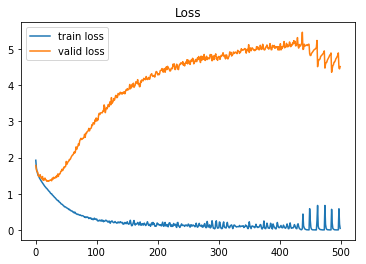

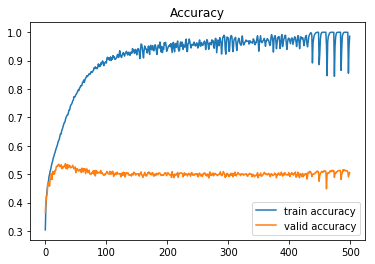

In [8]:
import matplotlib.pyplot as plt
# 以視覺畫方式檢視訓練過程

train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]

train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()